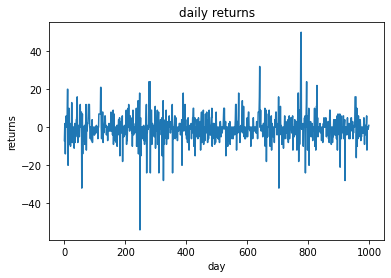

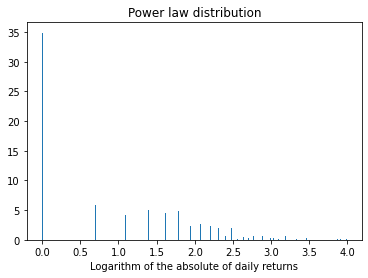

In [27]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from numpy import inf
from scipy import stats

n = 1000 # Number of agents
t = 10**3 # Time
p = 0.0115 # Probability
omega = 1 
size = 1 # Spending power per agent
k = 1 # Leverage factor

def buy_sell_hold(p):
    assert p <= 0.5, "p should be smaller than 0.5"
    p_bs = p # buy/sell
    p_h = 1 - 2*p # hold
    dice = rnd.randint(0, 100)/100 
    # if the dice rolls below p, roll a 50/50 dice to decide buy or sell
    if dice < p:
        if rnd.randint(0, 1) == 0:
            psi = 1
        else:
            psi = -1
    else:
        psi = 0
    return psi

class Agent:
    def __init__(self, size) -> None:
        self.size = size

class Model:
    def __init__(self, p: float, n: int, size: int, k: int, omega: int) -> None:
        self.n = n
        self.p = p
        self.agents = [Agent(size) for i in range(n)]
        self.daily_return = 0
        self.k = k
        self.omega = omega
        self.daily_returns = []
        self.daily_trading_volumes = []
        
    def distribute_opinion_groups(self) -> None:
        if self.daily_return == 0:
            c = self.n
        else:
            c = (self.n // self.daily_return) ** self.omega

        opinion_groups = [[] for i in range(c)]

        for opinion_group in opinion_groups:
            for i in range(self.n // c):
                opinion_group.append(rnd.choice(self.agents))

        return opinion_groups

    # Time step within the simulation
    def step(self):
        opinion_groups = self.distribute_opinion_groups()
        self.daily_return = 0
        self.daily_trading_volume = 0

        for opinion_group in opinion_groups:
            psi = buy_sell_hold(self.p)
            self.daily_return += psi * len(opinion_group)
            self.daily_trading_volume += abs(self.daily_return)
            
        self.daily_return *= self.k
        self.daily_returns.append(self.daily_return)
        self.daily_trading_volumes.append(self.daily_trading_volume)
        return True


model_test = Model(p, n, size, k, omega)
for i in range(t):
    model_test.step()

plt.plot(range(t), model_test.daily_returns)
plt.title("daily returns")
plt.xlabel("day")
plt.ylabel("returns")
plt.show()

returns = [abs(day) for day in model_test.daily_returns]
returns = np.array(returns)
returns = np.log(returns)
np.seterr(divide='ignore')
returns[returns == -inf] = 0
plt.hist(returns, 300, density=True)
plt.title("Power law distribution")
plt.xlabel("Logarithm of the absolute of daily returns")
plt.show()

In [26]:
#Kolmogorov-smirnov test
from scipy import stats
rng = np.random.default_rng()
stats.kstest(stats.uniform.rvs(size=100, random_state=rng),
             stats.norm.cdf)

KstestResult(statistic=0.5014820767009442, pvalue=8.643601192683203e-24)

In [ ]:
# RMSE Formula
return np.sqrt(np.mean((predictions-targets)**2))